In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Q6

In [2]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

## part a

<h3> in this section we want to implement : </h3>

1.   Averaging Blurring
2.   Median Blurring
3.   Gaussian Blurring

<h3> you should define reflect101 padding function and use it befor blurring </h3>
<h3><b> note : you can't use libraries in this section </b></h3>
<h3><b> note : you can't use loop in Reflect101 function </b></h3>




In [3]:
def Reflect101(img,filter_size):
  '''
    Do not use loop (like while and for)
    Do not use libraries
    calculate averaging filter
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      image (ndarray): computed Reflect101
  '''
  
  #######################
  #    your code here   #
  #######################
  rows, cols = img.shape
  padd_size = filter_size // 2
  image = np.zeros((rows+2*padd_size, cols+2*padd_size), dtype=img.dtype)
  # fill the top padded image
  image[0:padd_size, padd_size:-padd_size] = np.flipud(img[1:padd_size+1, :])
  # fill the down padded image
  image[-padd_size:, padd_size:-padd_size] = np.flipud(img[-padd_size-1:-1, :])
  # fill the right padded image
  image[padd_size:-padd_size, -padd_size:] = np.fliplr(img[:, -padd_size-1:-1])
  # fill the left padded image
  image[padd_size:-padd_size, 0:padd_size] = np.fliplr(img[:, 1:padd_size+1])

  # fill the corners of padded image
  image[0:padd_size, 0:padd_size] = np.fliplr(np.flipud(img[1:padd_size+1, 1:padd_size+1]))
  image[0:padd_size, -padd_size:] = np.fliplr(np.flipud(img[1:padd_size+1, -padd_size-1:-1]))
  image[-padd_size:, 0:padd_size] = np.fliplr(np.flipud(img[-padd_size-1:-1, 1:padd_size+1]))
  image[-padd_size:, -padd_size:] = np.fliplr(np.flipud(img[-padd_size-1:-1, -padd_size-1:-1]))

  #fill the center of padded image
  image[padd_size:-padd_size, padd_size:-padd_size] = img

  
  return image

In [4]:
def Averaging_Blurring(img, filter_size):
  '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      result (ndarray): computed averaging blurring
  '''
  image = Reflect101(img, filter_size)
  result = np.zeros((img.shape))
  
  #######################
  #    your code here   #
  #######################
  kernel = np.ones((filter_size, filter_size), dtype=np.float32) / (filter_size**2)
  for i in range(result.shape[0]):
    for j in range(result.shape[1]):
      result[i, j] = np.sum(kernel * image[i:i+filter_size, j:j+filter_size])
  
  return result

In [5]:
def Median_Blurring(img, filter_size):
  '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      result (ndarray): computed median blurring
  '''
  image = Reflect101(img, filter_size)
  result = np.zeros((img.shape))
  
  #######################
  #    your code here   #
  #######################
  for i in range(result.shape[0]):
    for j in range(result.shape[1]):
      sel_region = image[i:i+filter_size, j:j+filter_size]
      median_val = np.median(sel_region)
      result[i, j] = median_val
  return result

In [6]:
def Gaussian_Blurring(img, filter_size, std):
    '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (tuple): filter size
      std (float): std of gaussian kernel
    output(s):
      result (ndarray): computed gaussian blurring
    '''
    kernel = np.zeros((filter_size,filter_size))
    #######################
    #    your code here   #
    #######################
    constant = 1 / (2 * np.pi * std ** 2)
    for i in range(filter_size):
        for j in range(filter_size):
            s = i - filter_size // 2
            t = j - filter_size // 2
            kernel[i, j] = np.exp(-(s**2 + t**2) / (2 * std**2))

    kernel = kernel / np.sum(kernel)
    output = img.copy()
    result = cv2.filter2D(src = output, ddepth = -1, kernel = kernel)
    return result

In [7]:
# Do not change this cell
# i read the image from the google drive
path = '/content/drive/MyDrive/ColabNotebooks/FCV/HW2/images/taj.jpg'
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

(-0.5, 299.5, 299.5, -0.5)

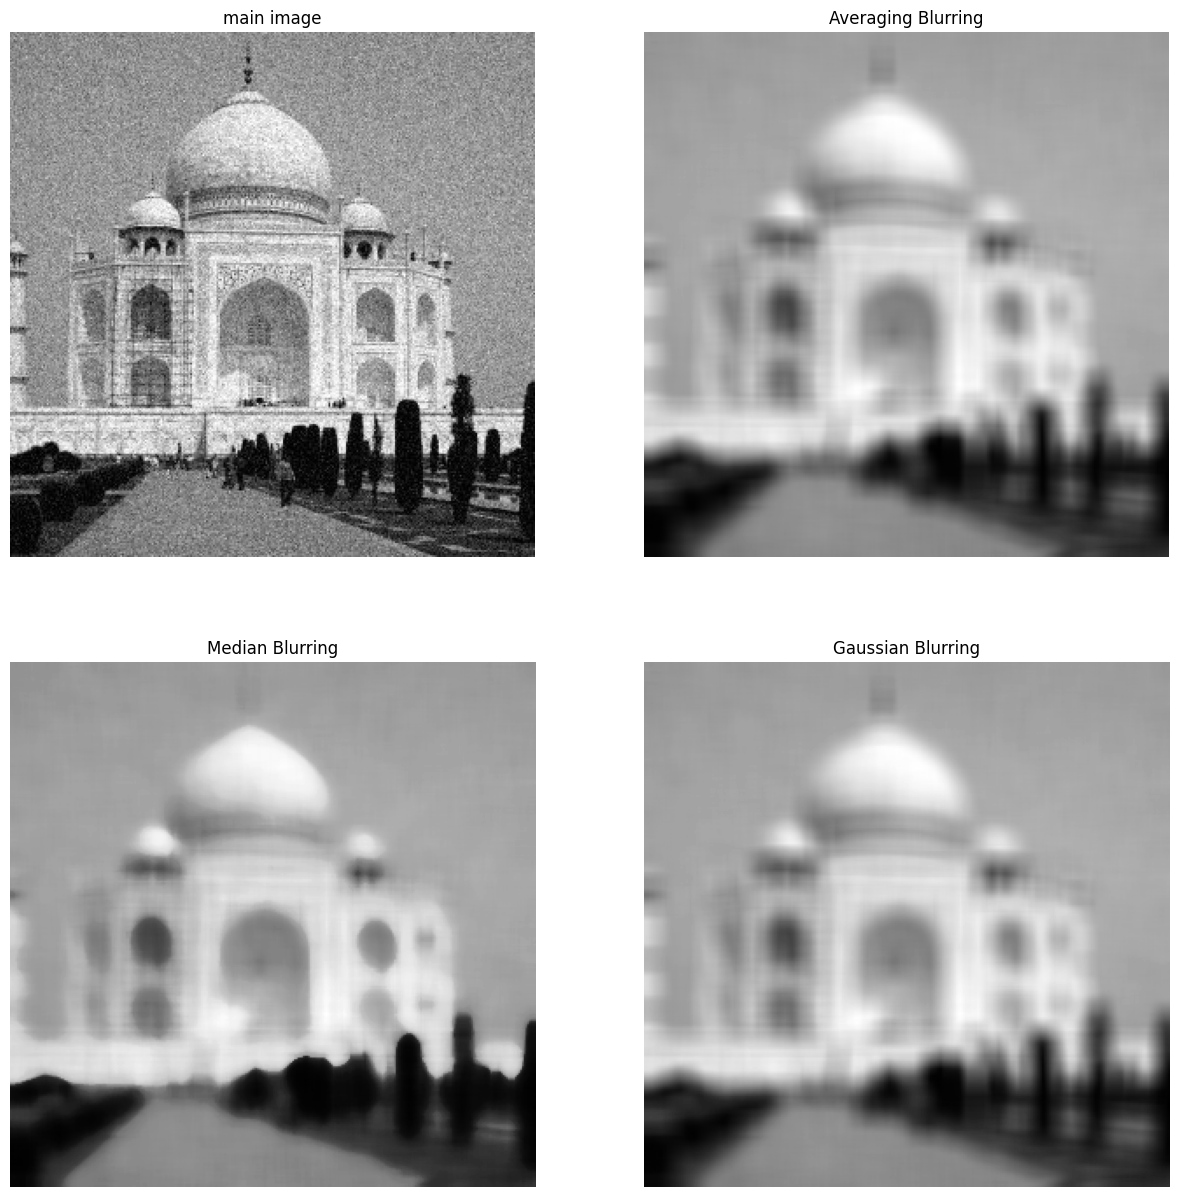

In [8]:
# Do not change this cell
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.title("main image")
plt.axis("off")

AB = Averaging_Blurring(image,15)
plt.subplot(2,2,2)
plt.imshow(AB,cmap='gray')
plt.title("Averaging Blurring")
plt.axis("off")

MB = Median_Blurring(image,15)
plt.subplot(2,2,3)
plt.imshow(MB,cmap='gray')
plt.title("Median Blurring")
plt.axis("off")

GB = Gaussian_Blurring(image,15,40)
plt.subplot(2,2,4)
plt.imshow(GB,cmap='gray')
plt.title("Gaussian Blurring")
plt.axis("off")


## part b

<h3> in this section we want to implement Bilateral Filtering </h3>
<h3> first you need to read about it and write about it in your report </h3>
<h3><b> note : you can't use libraries in this section </b></h3>


In [9]:
def Bilateral_Filtering(img, filter_size, std, rstd):
    '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (tuple): filter size
      std (float): value of std in the coordinate space
      rstd (float): value of std in the color space
    output(s):
      result (ndarray): computed Bilateral blurring
    '''
    result = img.copy()
    image = Reflect101(img, filter_size)
    #######################
    #    your code here   #
    #######################
    pad_size = filter_size // 2
    # Gaussian kernel in the spatial domain
    # spatial_kernel = np.zeros((filter_size, filter_size))
    # for i in range(filter_size):
    #     for j in range(filter_size):
    #         spatial_kernel[i, j] = math.exp(-((i-pad_size)**2 + (j-pad_size)**2) / (2*std**2))
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):

            spatial_kernel = np.zeros((filter_size, filter_size))
            for l in range(filter_size):
                for m in range(filter_size):
                    spatial_kernel[l, m] = math.exp(-((i-l)**2 + (j-m)**2) / (2*std**2)) * (1/2*np.pi*std**2)
            
            # Get the pixel and its neighbors
            neighborhood = image[i:i+filter_size, j:j+filter_size]
            pixel = img[i,j]
            
            # Gaussian kernel in the intensity domain
            intensity_kernel = np.exp(-(neighborhood-pixel)**2/(2*rstd**2)) / (np.sqrt(2*np.pi) * rstd)
            
            # Compute the weighted sum of the neighborhood and the weights
            weights = spatial_kernel * intensity_kernel
            result[i,j] = np.sum(weights * neighborhood) / np.sum(weights)

    return result

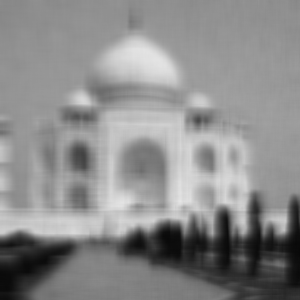

In [10]:
# Do not change this cell
bilateral = Bilateral_Filtering(image, 15, 40, 40)
cv2_imshow(bilateral)

## part c

<h3> in this section we want to implement all blurrings with opencv and compare their with part b </h3>
<h3><b> note : for comparison, the parameters should be the same as in part b </b></h3>

In [ ]:
AveragingBlurring = cv2.blur(image, (15,15))
MedianBlurring = cv2.medianBlur(image, 15)
GaussianBlurring = cv2.GaussianBlur(image, (15,15), 40)
Bilateral = cv2.bilateralFilter(image, 15, 40, 40)

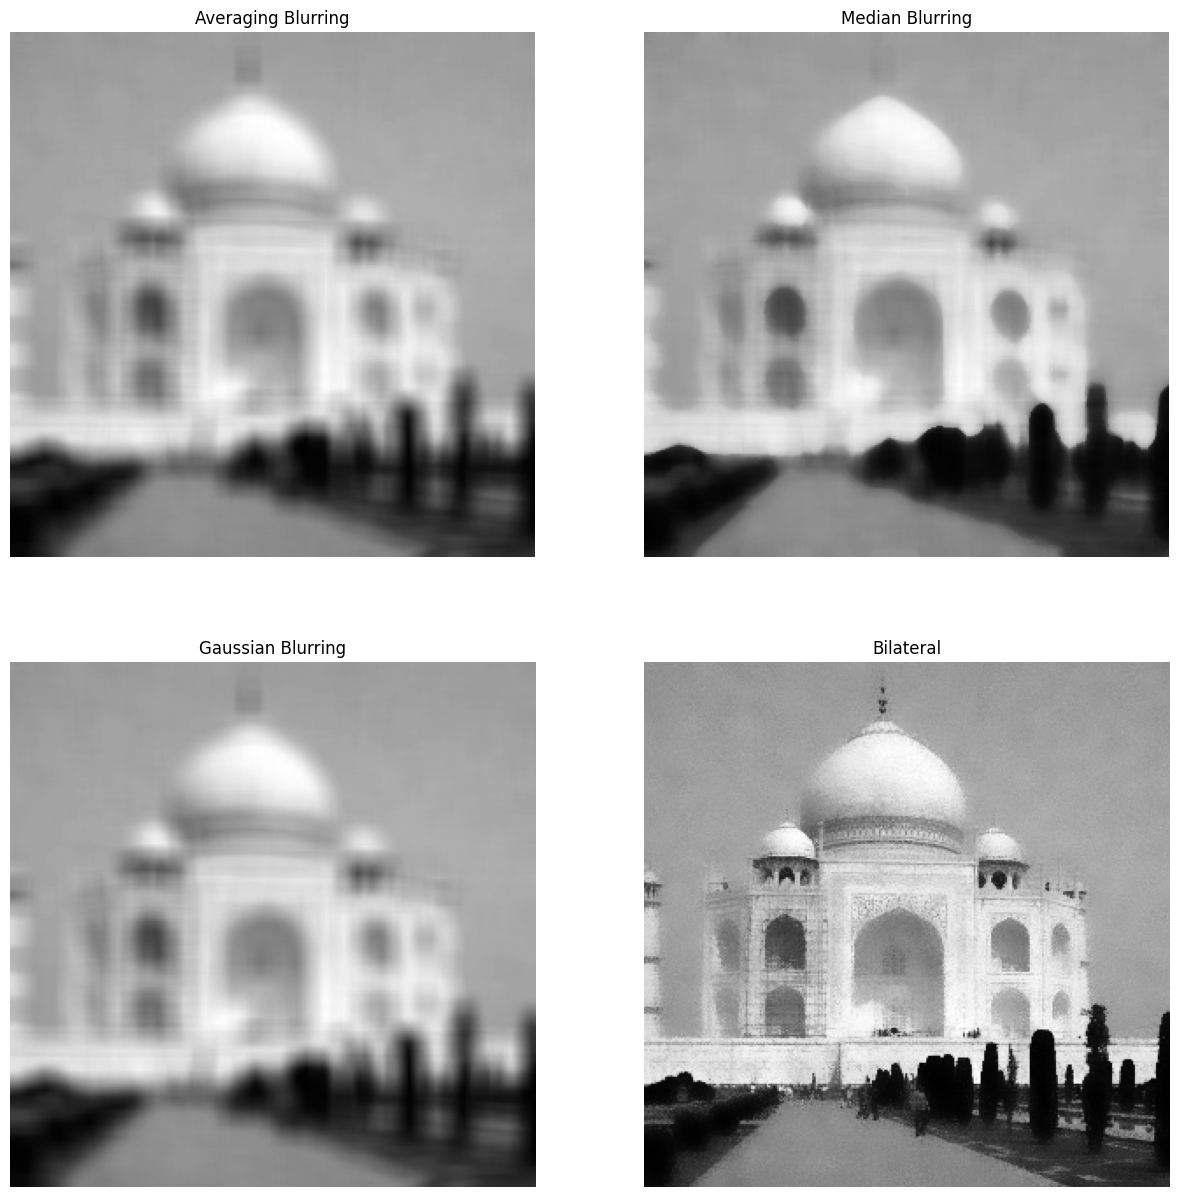

In [ ]:
# Do not change this cell
Array = [AveragingBlurring, MedianBlurring, GaussianBlurring, Bilateral]
titles = ['Averaging Blurring', 'Median Blurring', 'Gaussian Blurring', 'Bilateral']
plt.figure(figsize=(15,15))
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(Array[i],cmap='gray')
  plt.title(titles[i])
  plt.axis("off")